# Data Cleaning and Preprocessing

This notebook performs the following steps:
1. Load and inspect the data
2. Handle missing values
3. Remove duplicates
4. Handle outliers
5. Convert data types
6. Save cleaned data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic plot parameters
plt.rcParams['figure.figsize'] = (10, 6)

## 1. Load and Inspect Data

In [2]:
# Read the CSV file
df = pd.read_csv('../data/raw/HGG_DB.csv')

# Display basic information about the dataset
print("\nDataset Info:")
df.info()

# Standardize column names
df.columns = df.columns.str.strip() \
                        .str.lower() \
                        .str.replace(' ', '_') \
                        .str.replace('[^a-z0-9_]', '', regex=True)

print("Cleaned column names:", df.columns.tolist())

# Display dataset dimensions (rows and columns)
print(f"\nDataset Shape: {df.shape[0]} rows and {df.shape[1]} columns")

# Display the first 5 rows of the dataset
print("\nFirst 5 Rows:")
print(df.head().to_string(index=False))  # Ensures the output is aligned neatly

# Display column names for reference
print("\nColumn Names:")
print(', '.join(df.columns))  # Displays column names in a single clean line

# Check for duplicates (for reference in future processing)
num_duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sample            112 non-null    object
 1   DIPG/NBS-HGG      112 non-null    object
 2   Location          109 non-null    object
 3   Tumor Grade       105 non-null    object
 4   <3 yrs            112 non-null    object
 5   ACVR1             18 non-null     object
 6   Histone3          60 non-null     object
 7   ATRX              17 non-null     object
 8   BCOR              9 non-null      object
 9   BCORL1            3 non-null      object
 10  MYC               3 non-null      object
 11  MYCN              3 non-null      object
 12  PDGFRA            23 non-null     object
 13  MET               7 non-null      object
 14  NTRK1/2/3         8 non-null      object
 15  EGFR              6 non-null      object
 16  PIK3CA            14 non-null     object
 17  P

## 2. Handle Missing Values


Missing Value Summary:
              Non-Missing Count  Missing Count  Missing Percentage
location                    109              3            2.678571
tumor_grade                 105              7            6.250000
acvr1                        18             94           83.928571
histone3                     60             52           46.428571
atrx                         17             95           84.821429
bcor                          9            103           91.964286
bcorl1                        3            109           97.321429
myc                           3            109           97.321429
mycn                          3            109           97.321429
pdgfra                       23             89           79.464286
met                           7            105           93.750000
ntrk123                       8            104           92.857143
egfr                          6            106           94.642857
pik3ca                       14       

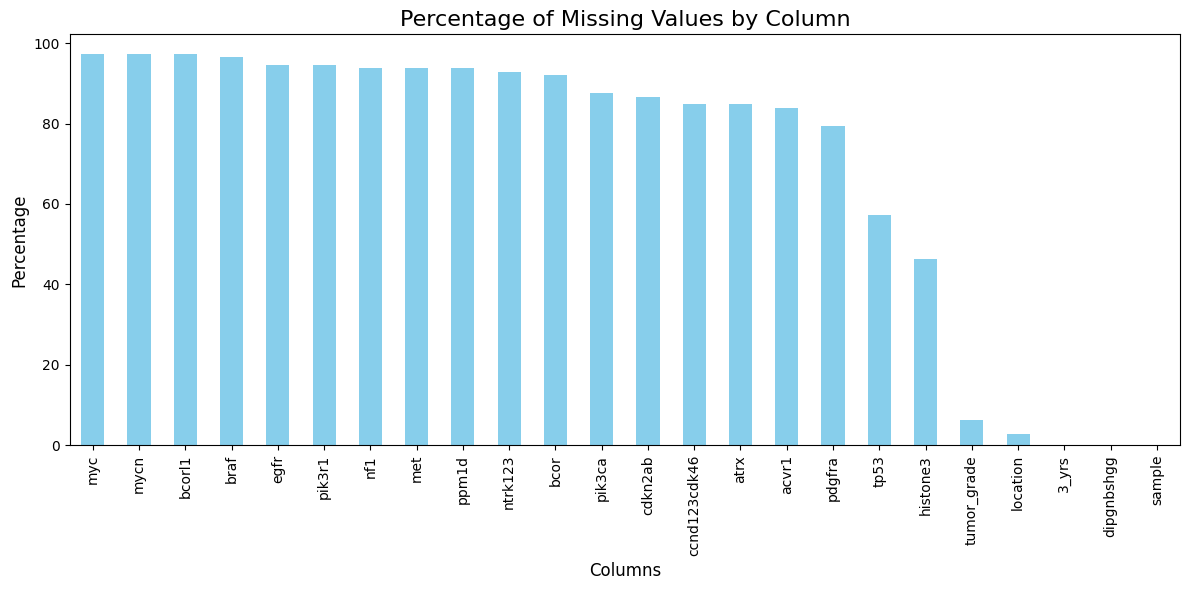

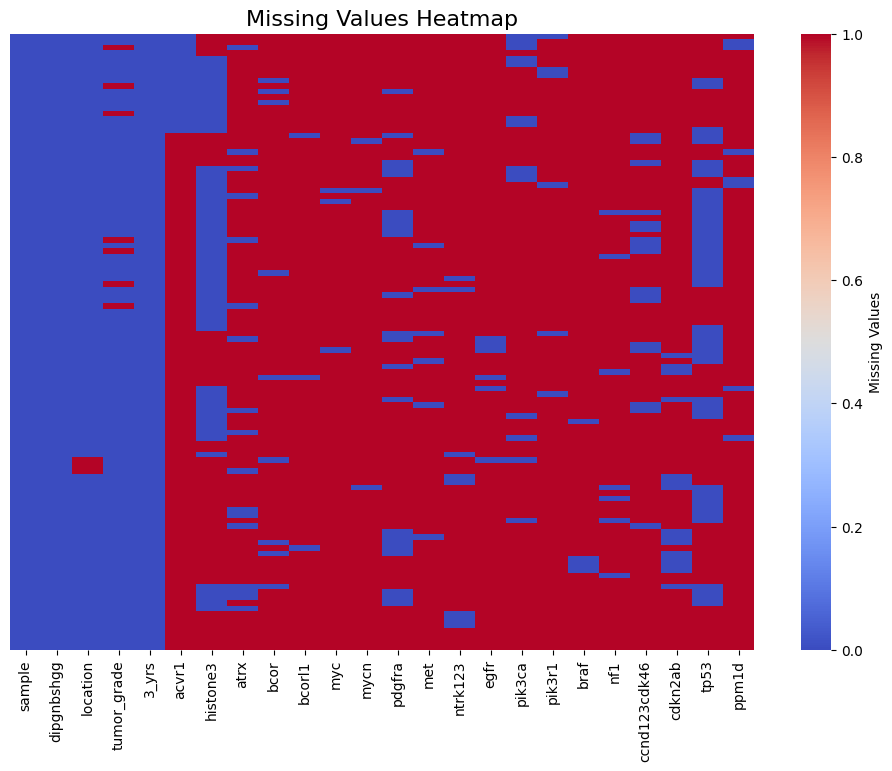


Missing Values After Replacement:
sample          0
dipgnbshgg      0
location        0
tumor_grade     0
3_yrs           0
acvr1           0
histone3        0
atrx            0
bcor            0
bcorl1          0
myc             0
mycn            0
pdgfra          0
met             0
ntrk123         0
egfr            0
pik3ca          0
pik3r1          0
braf            0
nf1             0
ccnd123cdk46    0
cdkn2ab         0
tp53            0
ppm1d           0
dtype: int64


In [3]:
# Step 1: Identify missing values
missing_value_summary = pd.DataFrame({
    'Non-Missing Count': df.notnull().sum(),
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': (df.isnull().sum() / len(df)) * 100
})

# Display the table of missing values
print("\nMissing Value Summary:")
print(missing_value_summary[missing_value_summary['Missing Count'] > 0])

# Step 2: Visualize missing values
# Bar chart of missing percentages
plt.figure(figsize=(12, 6))
sorted_summary = missing_value_summary.sort_values(by='Missing Percentage', ascending=False)  # Sort columns
sorted_summary['Missing Percentage'].plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Columns', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='coolwarm', cbar_kws={'label': 'Missing Values'})
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()

# Step 3: Replace missing values with 'None'
df.fillna('None', inplace=True)

# Step 4: Confirm no missing values remain
print("\nMissing Values After Replacement:")
print(df.isnull().sum())


## 3. Remove Duplicates

In [4]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

# Remove duplicates if any exist
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)


Number of duplicate rows: 0


## 4. Handle Outliers

In [5]:
# Step 1: Identify numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) == 0:
    print("\nNo numerical columns found in the dataset. Skipping outlier detection.")
else:
    # Step 2: Display basic statistics for numerical columns
    print("\nBasic Statistics:")
    print(df[numeric_cols].describe())

    # Step 3: Create box plots to visualize outliers (if numerical columns exist)
    plt.figure(figsize=(15, 5))
    df.boxplot(column=numeric_cols)
    plt.xticks(rotation=45)
    plt.title('Box Plots for Numerical Columns')
    plt.show()

    # Step 4: Identify and flag outliers using IQR
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # 25th percentile
        Q3 = df[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find and display outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"\nOutliers in column {col}:")
        print(outliers[[col]])

        # Add a flag column for outliers
        df[f'{col}_is_outlier'] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

    # Step 5: Check the dataset for the new outlier flags
    print("\nColumns with outlier flags added:")
    print([col for col in df.columns if '_is_outlier' in col])


No numerical columns found in the dataset. Skipping outlier detection.


## 5. Convert Data Types

In [6]:
# Check the existing column names
print("\nColumn Names:")
print(df.columns.tolist())

# Filter existing columns for conversion
categorical_cols = [col for col in ['dipg_nbs_hgg', 'location', 'tumor_grade'] if col in df.columns]
if categorical_cols:
    df[categorical_cols] = df[categorical_cols].astype('category')
    print(f"\nConverted columns to 'category': {categorical_cols}")
else:
    print("\nNo relevant columns found for conversion to 'category'.")


Column Names:
['sample', 'dipgnbshgg', 'location', 'tumor_grade', '3_yrs', 'acvr1', 'histone3', 'atrx', 'bcor', 'bcorl1', 'myc', 'mycn', 'pdgfra', 'met', 'ntrk123', 'egfr', 'pik3ca', 'pik3r1', 'braf', 'nf1', 'ccnd123cdk46', 'cdkn2ab', 'tp53', 'ppm1d']

Converted columns to 'category': ['location', 'tumor_grade']


## 6. Save Cleaned Data

In [7]:

# Save the cleaned dataset to a new CSV file
df.to_csv('../data/processed/HGG_DB_cleaned.csv', index=False)



print("\nCleaned dataset saved to '../data/processed/HGG_DB_cleaned.csv'")


Cleaned dataset saved to '../data/processed/HGG_DB_cleaned.csv'
